# Анализ данных, для выявления стратегии игропроизводства на будущий год
***Задача***

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

***План исследования:***
1. Загрузить и обработать датафрэйм
2. Провести исследование данных
3. Выдвинуть и проверить гипотезы
4. Составить итоги исследования

# Table of Contents
* [Загрузка данных](#chapter1)
* [Предобработка данных](#chapter2)
* [Исследовательский анализ данных](#chapter3)
    * [Ответ на 1 вопрос](#section_3_1)
    * [Ответ на 2 вопрос](#section_3_2)
    * [Ответ на 3 вопрос](#section_3_3)
    * [Ответ на 4 вопрос](#section_3_4)
    * [Ответ на 5 вопрос](#section_3_5)
    * [Ответ на 6 вопрос](#section_3_6)
    * [Ответ на 7 вопрос](#section_3_7)
    * [Ответ на 8 вопрос](#section_3_8)
* [Портрет пользователя по регионам](#chapter4)
* [Проверка гипотез](#chapter5)
* [Заключение](#chapter6) 

# Шаг 1 - Загрузка данных, импортирование библиотек <a class="anchor" id="chapter1"></a>

In [1]:
#Импортирование нужных библиотек
import pandas as pd
import scipy 
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

***Описание данных***

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 
компьютерных игр и присваивает им подходящую возрастную категорию.

In [2]:
#загрузка датафрэйма, получение общей информации о датафрэйме
data = pd.read_csv('/datasets/games.csv')
display(data.head(10))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


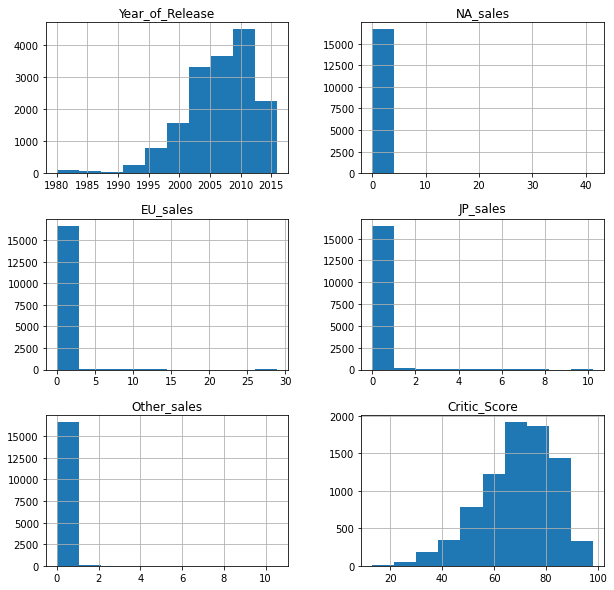

In [3]:
#составление первичного представления о датафрэйме
data.hist(figsize=(10, 10))
plt.show()

Данные содержат информацию об играх, годах их выпуска, характеристиках игры, а также о продажах в разных регионах, можно наблюдать, что некоторые типы данных не соответсвуют их значениям, стоит исправит, есть пропущенные значения, которые также нужно исследовать.

# Шаг 2 - предобработка данных <a class="anchor" id="chapter2"></a>

In [4]:
#Приведем название колонок к нижнему регистру
data.columns = map(str.lower, data.columns)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# Проверим наличие дупликатов
data.duplicated().sum()
#Удалим неявные дупликаты
data[['name', 'platform', 'year_of_release']].drop_duplicates()
dupl = data[['name', 'platform', 'year_of_release']].duplicated()
dupl[dupl].index
data.drop([659, 16240, 16230],inplace=True)
data[['name', 'platform', 'year_of_release']].duplicated().value_counts()

False    16712
dtype: int64

***Работа с пропусками:***
1. Проверим наличие пропусков
2. Заполним в колонках name, genre пустые значение на unknown
3. Заменим tbd (- to be determined) на NaN. Вероятно не успели внести в датасет значения, или прошло недостаточно времени, чтобы данные были выверены и актуальны
4. Заменим пропуски в rating на неизвестно, вероятно недостаточное количество оценок повлияло на возможность выставления рэйтинга
5. удалим те строки в которых у игр не указан год выпуска или он равен 0

In [6]:
data.isna().sum()
data.fillna(
    {"name" : "Unknown", 
     "genre" : "Unknown"}
    , inplace=True)

In [7]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data["rating"] = data['rating'].fillna("undefined")

In [8]:
data.dropna(subset=['year_of_release'])
data['year_of_release'].isna().value_counts()
data = data[data.year_of_release != 0 ]

In [38]:
# код ревьюера
data['year_of_release'].isna().value_counts()

False    16443
True       269
Name: year_of_release, dtype: int64

***Изменение типов данных в нужных стобцах:***
1. Приведем годы и оценки критиков в целочисленный тип, так как эти значения целые
2. Оценки пользователей приведем к типу float, так как в стобце только, нецелые числа

In [9]:
data['critic_score'].unique()
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8135 non-null   Int64  
 9   user_score       7588 non-null   float64
 10  rating           16712 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


***Создание столбца с суммарными продажами, окончательный взгляд на обработанный датафрэйм***

In [10]:
# Создадим новый столбец с сумарными продажами по всем регионам
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,undefined,28.31


Данные готовы к анализу. Было выполнено следующее.

1. Название столбцов было приведено к нижнему регистру
2. Восстановлены пропуски в строках.
3. Добавлен столбец суммарных продаж.

# Шаг 3 - Исследовательский анализ данных <a class="anchor" id="chapter3"></a>

Во время исследования данных, нужно выполнить следующие шаги:
1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
7. Соотнесите выводы с продажами игр на других платформах.
8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Получение ответа на первый вопрос <a class="anchor" id="section_3_1"></a>

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


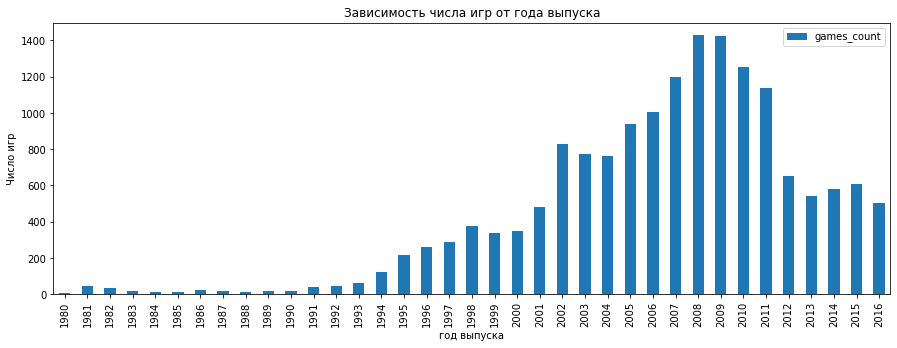

In [11]:
data['year_of_release'].max()
data['year_of_release'].min()
year_of_release_pivot_table = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot_table.columns = ['games_count']
display(year_of_release_pivot_table)
year_of_release_pivot_table.plot(kind = 'bar',figsize=(15,5))
plt.title('Зависимость числа игр от года выпуска')
plt.xlabel('год выпуска')
plt.ylabel('Число игр')
plt.show()

На диаграмме наблюдается, что до 1994 года количество выпущенных игр оставалось на низком уровне. Это может быть обусловлено ограниченными возможностями вычислительной техники и операционных систем в те годы, а также тем, что компьютеры были далеко не у всех пользователей. Освобождение ресурсов компьютеров для игр также не было приоритетом, поскольку они использовались в основном для других целей.

В 2002 году произошёл резкий скачок в количестве выпускаемых игр в год, вероятно, благодаря развитию технологий и увеличению интереса к игровой индустрии. Пик этого роста был достигнут в 2008-2009 годах. Однако последующий спад в производстве игр начался в результате распространения мобильных устройств и интеграции социальных сетей в повседневную жизнь. Эти изменения снизили интерес к традиционным видам игр, что отразилось на их производстве.

Получение ответа на 2 вопрос <a class="anchor" id="section_3_2"></a>

          total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.64
Wii            907.51
DS             806.12
PS             730.86
GBA            317.85
PS4            314.14
PSP            294.05
PC             259.51


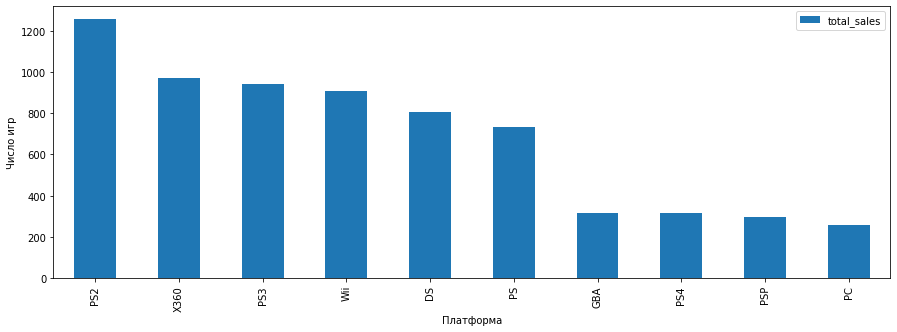

In [12]:
top10_platforms = data.pivot_table(index = 'platform', 
                                       values = 'total_sales', 
                                       aggfunc = 'sum').sort_values(by = 'total_sales', 
                                                                    ascending = False).head(10)
print(top10_platforms)
top10_platforms.plot(y="total_sales", kind='bar', figsize=(15,5))
plt.xlabel('Платформа')
plt.ylabel('Число игр')
plt.show()

Представили самые популярные платформы

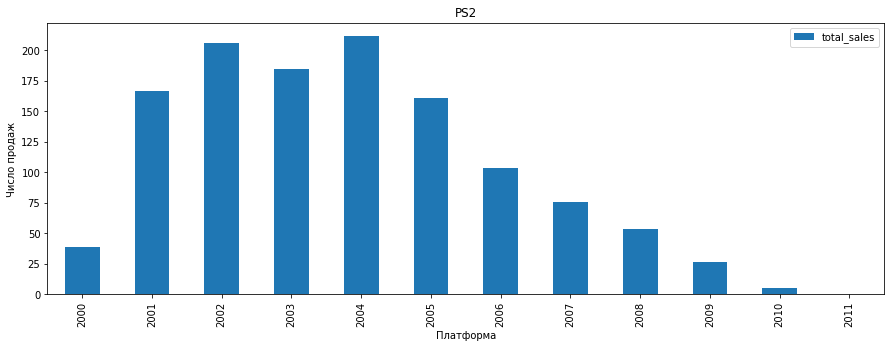

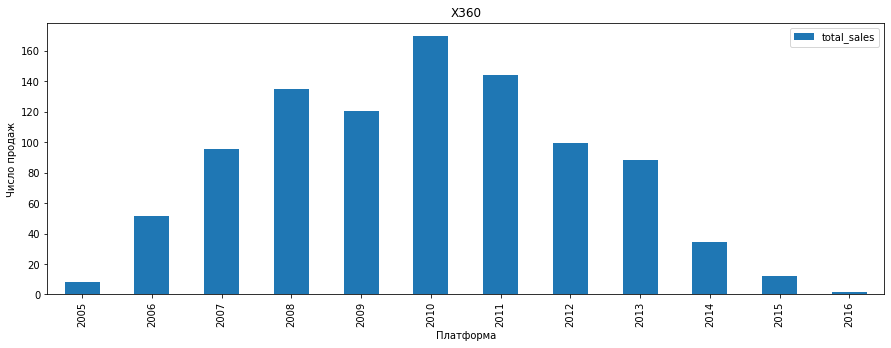

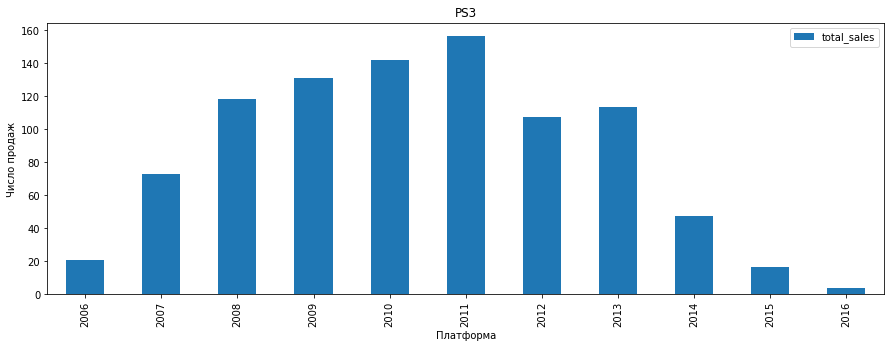

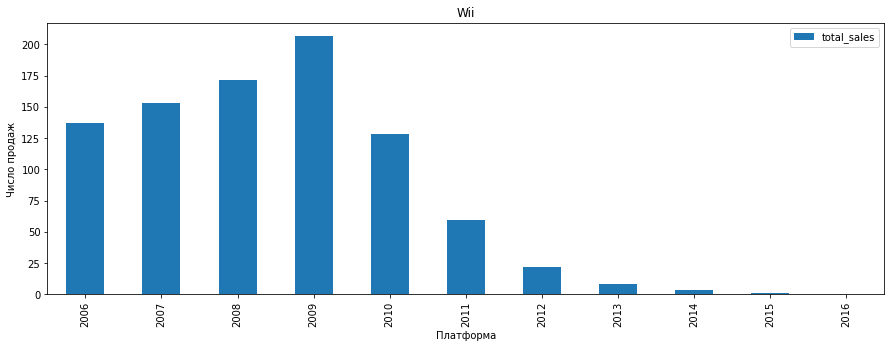

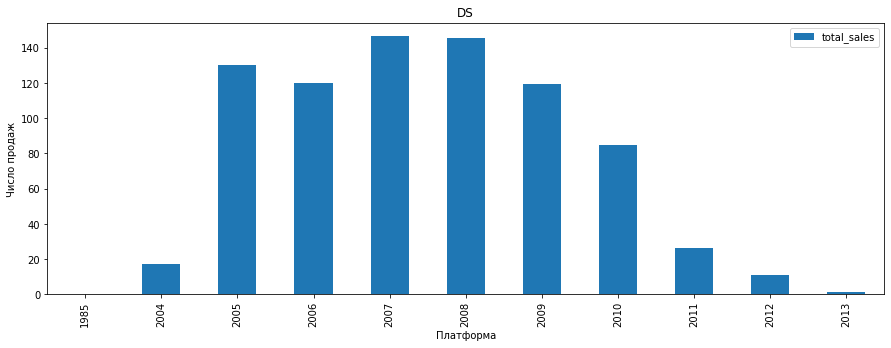

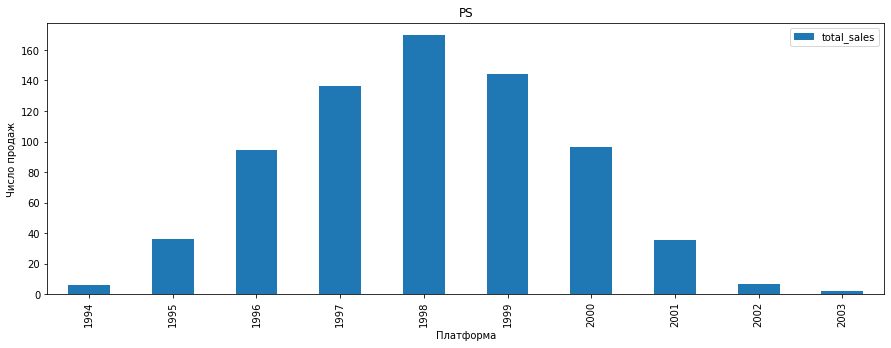

In [13]:
data[data['platform'] == 'PS2'].pivot_table(index = 'year_of_release', 
                                                     values = 'total_sales', 
                                                     aggfunc = 'sum').plot(kind = 'bar', 
                                                                           figsize=(15,5))
plt.title('PS2')
plt.xlabel('Платформа')
plt.ylabel('Число продаж')
plt.show()
data[data['platform'] == 'X360'].pivot_table(index = 'year_of_release', 
                                                     values = 'total_sales', 
                                                     aggfunc = 'sum').plot(kind = 'bar', 
                                                                           figsize=(15,5))
plt.title('X360')
plt.xlabel('Платформа')
plt.ylabel('Число продаж')
plt.show()
data[data['platform'] == 'PS3'].pivot_table(index = 'year_of_release', 
                                                     values = 'total_sales', 
                                                     aggfunc = 'sum').plot(kind = 'bar', 
                                                                           figsize=(15,5))
plt.title('PS3')
plt.xlabel('Платформа')
plt.ylabel('Число продаж')
plt.show()
data[data['platform'] == 'Wii'].pivot_table(index = 'year_of_release', 
                                                     values = 'total_sales', 
                                                     aggfunc = 'sum').plot(kind = 'bar', 
                                                                           figsize=(15,5))
plt.title('Wii')
plt.xlabel('Платформа')
plt.ylabel('Число продаж')
plt.show()
data[data['platform'] == 'DS'].pivot_table(index = 'year_of_release', 
                                                     values = 'total_sales', 
                                                     aggfunc = 'sum').plot(kind = 'bar', 
                                                                           figsize=(15,5))
plt.title('DS')
plt.xlabel('Платформа')
plt.ylabel('Число продаж')
plt.show()
data[data['platform'] == 'PS'].pivot_table(index = 'year_of_release', 
                                                     values = 'total_sales', 
                                                     aggfunc = 'sum').plot(kind = 'bar', 
                                                                           figsize=(15,5))
plt.title('PS')
plt.xlabel('Платформа')
plt.ylabel('Число продаж')
plt.show()

Можно отметить, что каждая из перечисленных игровых платформ имела примерно десятилетний жизненный цикл.

Например, PlayStation 2 просуществовала с 2000 по 2010 год (точно 10 лет), Nintendo DS — с 2004 по 2013 год (9 лет), Xbox 360 — с 2006 по 2015 год (также 9 лет), а Wii — с 2006 по 2015 год (также 9 лет). PlayStation 3 осталась в строю с 2006 по 2016 год (10 лет).

Стоит заметить, что плафторма DS, и ее последователь 3DS популярны в родном регионе, что также отражено в данных и это влияет на продолжительность жизни плафтормы

Таким образом, средний срок службы игровой консоли составляет около десяти лет. Это является закономерным явлением, поскольку технический прогресс продвигает аппаратные возможности, и "железо" старых консолей перестает соответствовать требованиям современных игр.

Ответ на 3 вопрос <a class="anchor" id="section_3_3"></a>

В 2006 году наблюдается заметный всплеск в появлении новых игровых платформ, таких как Wii, PS3 и Xbox 360. Интересно отметить, что характерный срок жизни этих платформ составляет около десяти лет, что становится явным к 2013 году, когда мы видим их активный спад.

Этот период также характеризуется возрастанием интереса к новым платформам, которые остаются актуальными в наше время. Эти платформы становятся основным объектом анализа и изучения для понимания текущих тенденций и перспектив развития игровой индустрии.

Таким образом, по моему мнению, данные, наиболее репрезентативные для анализа, можно считать начиная с 2013 года, когда начинается переход от старых к новым игровым платформам.

In [14]:
actual_data = data.query('year_of_release >= 2013') #возьмем все данные после 2013 года

Ответ на 4 вопрос <a class="anchor" id="section_3_4"></a>

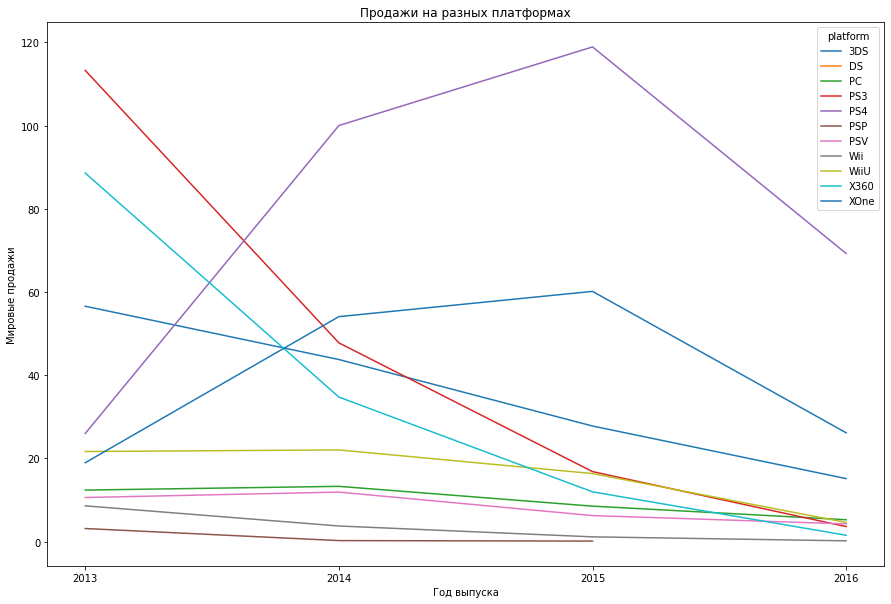

In [41]:
actual_data.pivot_table(index='year_of_release', 
                                                columns = 'platform', 
                                                values='total_sales', 
                                                aggfunc='sum').plot(figsize=(15, 10))

plt.title('Продажи на разных платформах')
plt.xlabel('Год выпуска')
plt.ylabel('Мировые продажи')

plt.xticks(list(actual_data['year_of_release'].unique())) #  код ревьюера

plt.show()

In [16]:
actual_data['year_of_release'].unique()

<IntegerArray>
[2013, 2015, 2014, 2016]
Length: 4, dtype: Int64

Продажи игр на всех платформах общим трендом идут на спад. Однако стоит отметить, что игры для PlayStation 4 (PS4) продолжают продаваться сравнительно лучше, вероятно, благодаря относительной новизне этой консоли на рынке. PS4 представляет собой потенциально прибыльную платформу, а также PC, который демонстрирует стабильные, хоть и небольшие, объемы продаж.

Спрос на консоли Xbox 360 и PlayStation 3 падает наиболее резко, что может быть связано с их устаревшими техническими характеристиками и появлением более современных альтернатив. Для остальных консолей спрос уже давно упал или они вовсе перестали продаваться.

Таким образом, среди перечисленных платформ потенциально прибыльными являются Nintendo 3DS, PlayStation 4 (PS4) и Xbox One (XOne), в то время как Xbox 360, PlayStation 3 и PSP (PlayStation Portable) скорее всего не будут иметь значительных продаж в будущем.

Ответ на 5 вопрос <a class="anchor" id="section_3_5"></a>

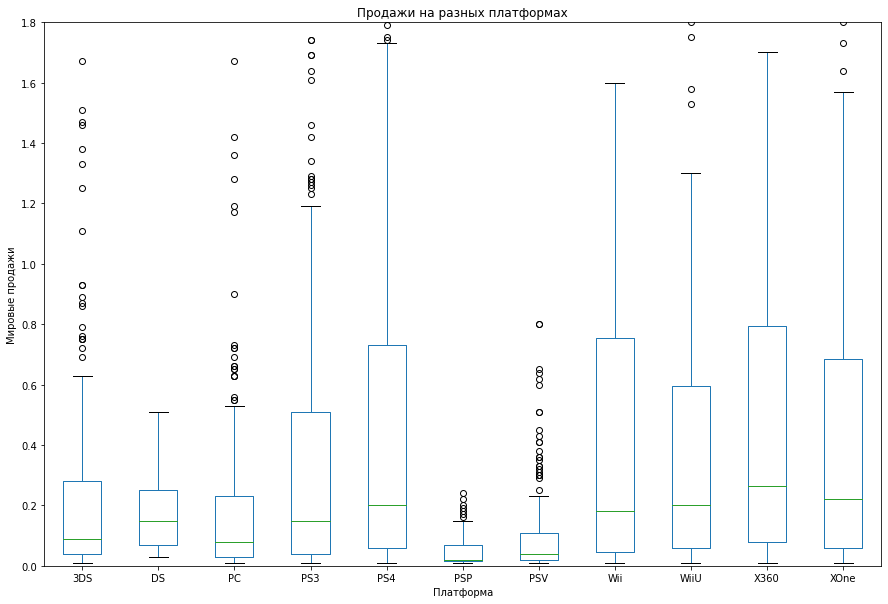

In [17]:
actual_data.pivot_table(index = 'name', 
                        columns = 'platform', 
                        values = 'total_sales', 
                        aggfunc = 'sum').plot(kind='box', ylim=(0,1.8), figsize=(15,10))
plt.title('Продажи на разных платформах')
plt.xlabel('Платформа')
plt.ylabel('Мировые продажи')
plt.show()

Вывод
Медианные продажи наибольшие у платформы Wii U, за ней следуют Xbox One, а затем PlayStation 4. Такое положение вещей с Xbox One и PlayStation 4 можно объяснить тем, что эти консоли были выпущены на рынок позже других. Они получили меньше времени для аккумулирования продаж, чем их предшественники.

Почти на всех платформах наблюдаются многочисленные выбросы в данных о продажах. Вероятно, это связано с тем, что некоторые игры стали популярными и были распространены бесплатно или по сниженной цене, либо привлекли большое внимание геймеров, что повлекло за собой аномально высокие продажи.

Также стоит отметить, что компьютерные игры (PC) обычно стоят дешевле, чем игры для консолей, и это может влиять на спрос и продажи. В дополнение к этому, игровые приставки часто обладают специализированными возможностями, которые делают их более удобными для игр, чем персональные компьютеры.

Ответ на 6 вопрос (для примера возьмем плтаформу 'PS4') <a class="anchor" id="section_3_6"></a>

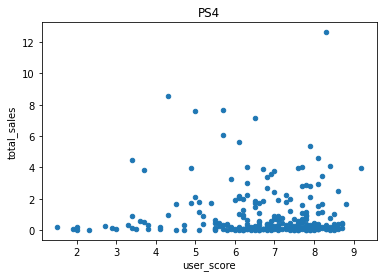

Матрица корреляций


,total_sales,user_score
total_sales,1.000000,-0.031957
user_score,-0.031957,1.000000


In [18]:
actual_data[actual_data['platform'] == "PS4"].plot.scatter(x= 'user_score', y = 'total_sales')
plt.title('PS4')
plt.show()
print("Матрица корреляций")
actual_data[actual_data['platform'] == "PS4"][['total_sales','user_score']].corr()

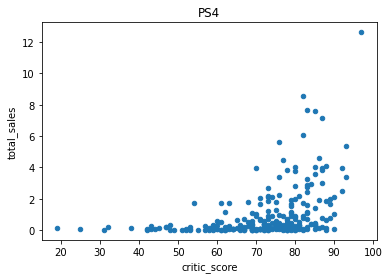

Матрица корреляций


,total_sales,critic_score
total_sales,1.000000,0.406568
critic_score,0.406568,1.000000


In [19]:
actual_data[actual_data['platform'] == "PS4"].plot.scatter(x= 'critic_score', y = 'total_sales')
plt.title('PS4')
plt.show()
print("Матрица корреляций")
actual_data[actual_data['platform'] == "PS4"][['total_sales','critic_score']].corr()

В общем, мы наблюдаем закономерную тенденцию: чем выше оценка, тем качественнее игра и, как следствие, больше продаж. Однако есть и "аномалии", которые привлекают внимание. Например, в столбце с пользовательскими оценками есть игры, которые получили высокие рейтинги от пользователей, но при этом показали невысокие продажи. Это может быть обусловлено различными факторами, такими как недостаточная маркетинговая поддержка, невысокий уровень осведомленности о продукте или другие факторы, не связанные с качеством игры.

Корреляция между общими продажами и оценками критиков составляет 0.4, что вполне ожидаемо, учитывая, что мы наблюдали эту зависимость на графиках. Это подтверждает, что мнение критиков о игре влияет на ее коммерческий успех, но не является единственным фактором.

С другой стороны, корреляция между общими продажами и пользовательскими оценками отсутствует. Это может быть вызвано тем, что пользовательские оценки могут быть более субъективными и зависят от личных предпочтений и вкусов каждого игрока, а также от внешних факторов, таких как репутация разработчика или платформа, на которой вышла игра.

Ответ на 7 вопрос <a class="anchor" id="section_3_7"></a>

In [20]:
print("Матрица корреляций")
actual_data[actual_data['platform'] == "3DS"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


In [21]:
print("Матрица корреляций")
actual_data[actual_data['platform'] == "XOne"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


In [22]:
print("Матрица корреляций")
actual_data[actual_data['platform'] == "PS3"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


In [23]:
print("Матрица корреляций")
actual_data[actual_data['platform'] == "PSV"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.254742,0.000942
critic_score,0.254742,1.000000,0.611521
user_score,0.000942,0.611521,1.000000


По убыванию корреляции(оценка критиков)--> XOne, PS4,WiiU, 3DS, PSV,PC. По убыванию корреляции(оценка пользователей) почти нет связи за исключением WiiU, 3DS.

Ответ на 8 вопрос <a class="anchor" id="section_3_8"></a>

              total_sales
genre                    
Action             321.87
Adventure           23.64
Fighting            35.31
Misc                62.82
Platform            42.63
Puzzle               3.17
Racing              39.89
Role-Playing       145.89
Shooter            232.98
Simulation          21.76
Sports             150.65
Strategy            10.08


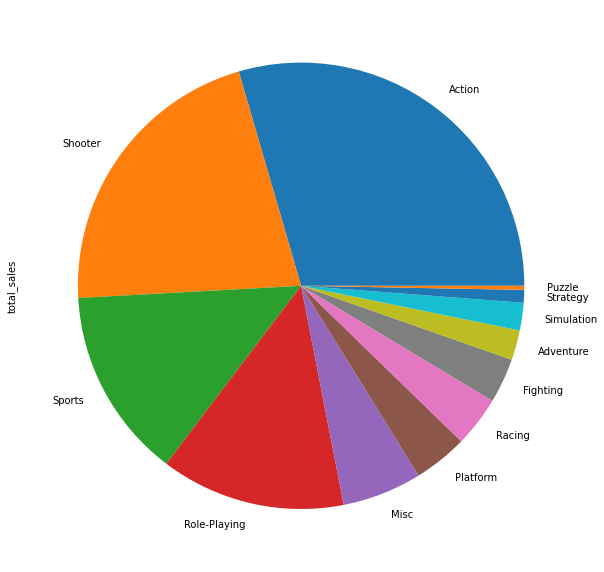

In [24]:
#Посмотрим на жанры у которых, наибольшие проаджи
print(actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum'))
actual_data.pivot_table(index = 'genre', 
                        values = 'total_sales', 
                        aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales').plot(kind='pie', 
                                                                                               figsize=(10,15), 
                                                                                               y= 'total_sales', legend = False)
plt.show()

Но общие продажи не всегда описывают прибыльность, рассмотрим прибыль как отношение числа общих продаж к числу игр в этом жанре

              name  total_sales     ratio
genre                                    
Shooter        187       232.98  1.245882
Sports         214       150.65  0.703972
Platform        74        42.63  0.576081
Role-Playing   292       145.89  0.499623
Racing          85        39.89  0.469294
Fighting        80        35.31  0.441375
Action         766       321.87  0.420196
Misc           155        62.82  0.405290
Simulation      62        21.76  0.350968
Puzzle          17         3.17  0.186471
Strategy        56        10.08  0.180000
Adventure      245        23.64  0.096490


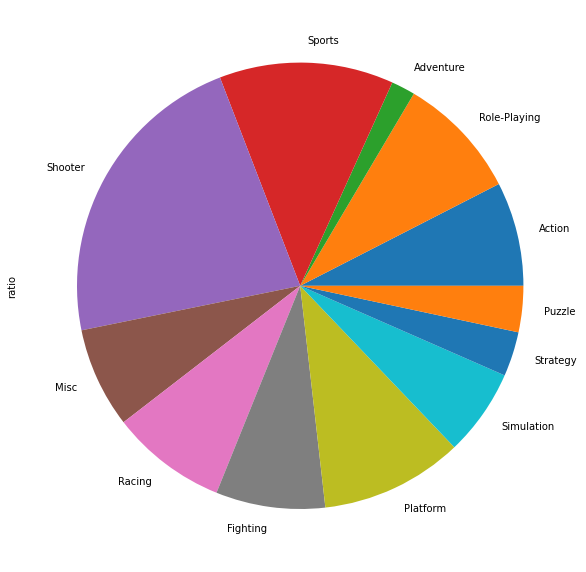

In [25]:
#Опишем прибыльность при помощи пропорции
ratio_genres = actual_data.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)
ratio_genres['ratio'] = ratio_genres['total_sales'] / ratio_genres['name']
print(ratio_genres.sort_values(by='ratio', ascending=False))
ratio_genres.plot(kind='pie', figsize=(10,15), y= 'ratio', legend = False)
plt.show()

Вывод:
 
Самый прибылный жанр - Шутеры

Самый не прибыльный - Adventure

# Шаг 4 - Портрет пользователя каждого региона<a class="anchor" id="chapter4"></a>

Составим портрет пользователя по трем кртирериям: платформа, жанр, рэйтинг

***Северная Америка***

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


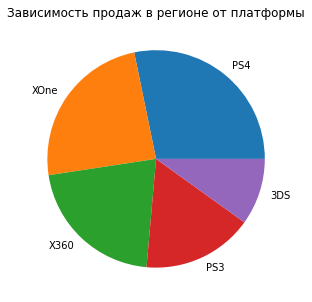

In [26]:
display(actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, 
                                                                                                     by = 'na_sales')[:5])
actual_data.pivot_table(index = 'platform', 
                        values = 'na_sales', 
                        aggfunc = 'sum').sort_values(ascending=False, 
                                                     by = 'na_sales')[:5].plot(kind = 'pie', y = 'na_sales', legend = False,
                                                                     figsize=(15,5))
plt.title('Зависимость продаж в регионе от платформы')
plt.ylabel('')
plt.show()

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


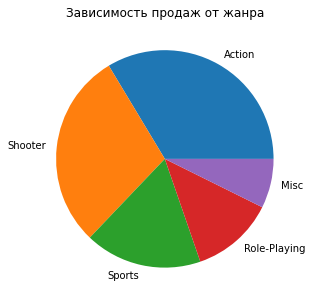

In [27]:
display(actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, 
                                                                                           by = 'na_sales')[:5])
actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, 
                                                                                           by = 'na_sales')[:5].plot(kind = 'pie', y = 'na_sales', legend = False, 
                                                                                                                 figsize=(15,5))
plt.title('Зависимость продаж от жанра')
plt.ylabel('')
plt.show()

Пользователи из Северной америки предпочитают играть на консолях PS4, XOne, X360 в Action, Shooter

***Европа***

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


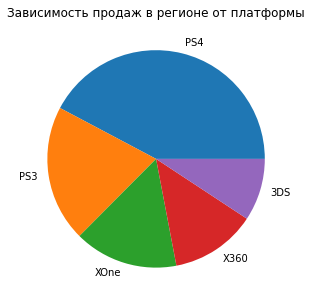

In [28]:
display(actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, 
                                                                                                     by = 'eu_sales')[:5])
actual_data.pivot_table(index = 'platform', 
                        values = 'eu_sales', 
                        aggfunc = 'sum').sort_values(ascending=False, 
                                                     by = 'eu_sales')[:5].plot(kind = 'pie', y = 'eu_sales', legend = False, 
                                                                     figsize=(15,5))
plt.title('Зависимость продаж в регионе от платформы')
plt.ylabel('')
plt.show()

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


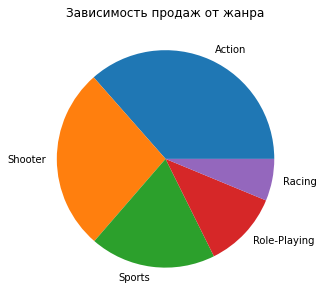

In [29]:
display(actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, 
                                                                                           by = 'eu_sales')[:5])
actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, 
                                                                                           by = 'eu_sales')[:5].plot(kind = 'pie', y = 'eu_sales', legend = False, 
                                                                                                                 figsize=(15,5))
plt.title('Зависимость продаж от жанра')
plt.ylabel('')
plt.show()

Пользователи из Европы предпочитают играть на консолях PS4 в Action, Shooter

***Япония***

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


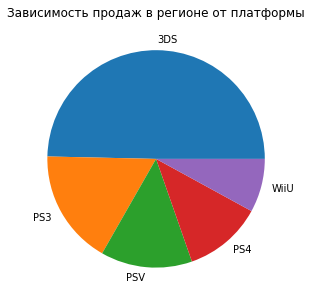

In [30]:
display(actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, 
                                                                                                     by = 'jp_sales')[:5])
actual_data.pivot_table(index = 'platform', 
                        values = 'jp_sales', 
                        aggfunc = 'sum').sort_values(ascending=False, 
                                                     by = 'jp_sales')[:5].plot(kind = 'pie', y = 'jp_sales', legend = False, 
                                                                     figsize=(15,5))
plt.title('Зависимость продаж в регионе от платформы')
plt.ylabel('')
plt.show()

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


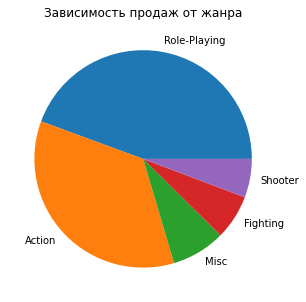

In [31]:
display(actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, 
                                                                                           by = 'jp_sales')[:5])
actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, 
                                                                                           by = 'jp_sales')[:5].plot(kind = 'pie', y = 'jp_sales', legend = False, 
                                                                                                                 figsize=(15,5))
plt.title('Зависимость продаж от жанра')
plt.ylabel('')
plt.show()

Пользователи из Японии предпочитают играть на консолях 3DS в Role-Playing, Action

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
undefined,78.91,85.05,89.42


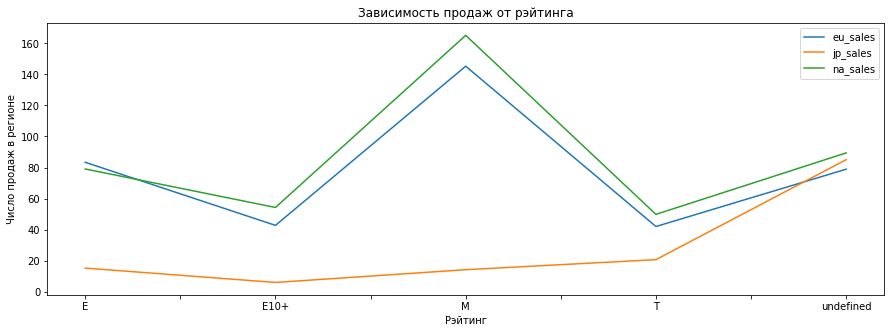

In [32]:
ESRB = actual_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
display(ESRB)
ESRB.plot(figsize=(15,5))
plt.title('Зависимость продаж от рэйтинга')
plt.xlabel('Рэйтинг')
plt.ylabel('Число продаж в регионе')
plt.show()

Да, рейтинг влияет на продажи в отдельных регионах. Так, например, игры с рейтингом M продавались в основном в Северной Америке и Европе, а в Японии значительно ниже продажи по сравнению с другими регионами.

# Шаг 5 - Проверка гипотез <a class="anchor" id="chapter5"></a>

Проверить следующие гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.?

пусть: alpha = 0.05

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [33]:
XOne = actual_data[actual_data['platform']=="XOne"]['user_score'].dropna()
PC = actual_data[actual_data['platform']=="PC"]['user_score'].dropna()

alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results_score = st.ttest_ind(
    XOne, 
    PC,
    equal_var = True)

print('p-значение:', results_score.pvalue)

if (results_score.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [34]:
Action = actual_data[actual_data['genre']=="Action"]['user_score'].dropna()
Sports = actual_data[actual_data['genre']=="Sports"]['user_score'].dropna()


alpha = .05

results_genre = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results_genre.pvalue)


if (results_genre.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. 

Таким образом, средние пользовательские рейтинги жанров Action и Sports отличаются

# Шаг 6 - Общий вывод <a class="anchor" id="chapter6"></a>

***Шаг 1. Подготовка данных***:

Мы начали исследование с изучения и подготовки предоставленных данных. Осмотрев датасет, мы выявили общую информацию о нем и выявили пропущенные значения и несоответствия типов данных.

В ходе этого этапа мы заполнили некоторые пропуски, обнаружив особое значение "tbd" (to be determined) и заменили его на NaN. Мы решили оставить многие пропуски, особенно в столбцах с оценками, незаполненными, чтобы не искажать статистические показатели.

Также на этом этапе мы вычислили общее количество продаж по всем регионам и добавили эти данные в столбец "total_sales".

***Шаг 3. Исследовательский анализ данных***:

В ходе анализа мы обнаружили, что рост выпуска игр наблюдается в 1994 году, а пик приходится на 2008-2009 годы.

Средний срок жизни игровой платформы составляет около 10 лет, поэтому мы сосредоточились на данных с 2013 по 2016 годы.

Мы выделили три потенциально прибыльные платформы: PS4, Xbox One и 3DS.

Медианные продажи наибольшие у платформ Xbox 360 и PS3.

Почти на всех платформах есть определенные игры, которые значительно выделяются по продажам.

Компьютерные игры стоят дешевле, чем игры для консолей, и это может влиять на их спрос и продажи.

***Шаг 4. Портрет пользователя региона***:

Мы проанализировали предпочтения пользователей в различных регионах. Например, в Северной Америке и Европе популярны платформы PS4 и Xbox One, в то время как в Японии популярна 3DS.

Также мы выявили, что предпочтения по жанрам игр в Северной Америке и Европе практически совпадают, но в Японии они отличаются.

***Шаг 5. Проверка гипотез***:

Мы проверили две гипотезы: о равенстве средних пользовательских рейтингов платформ Xbox One и PC, а также о различии средних пользовательских рейтингов жанров Action и Sports. Обе гипотезы не были отвергнуты. 